# TASK 2:TITANIC SURVIVAL PREDICTION

### IMPORTING THE DEPENDENCIES

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

### DATA COLLECTION AND PROCESSING

In [31]:
#loading the data file
titanic_data = pd.read_csv('Titanic-Dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
#rows and columns
titanic_data.shape

(891, 12)

In [33]:
# insighting through the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
#checking the null values in the column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### PROCESSING AND CLEANING THE DATA

In [35]:
#column "cabin" as more no of miss data.So removing that column from data frame
titanic_data.drop(columns ='Cabin',axis=1,inplace=True)
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [36]:
#replacing the missing value in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace = True)

In [37]:
#replacing the null values in Embarked column with mode 
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode(),inplace=True)

In [38]:
#rechecking for null values
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [40]:
#statistical insight about the given data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


removing unnecessary columns

In [42]:
#passengerId,Name and Ticket are not important column while data modelling 
titanic_data.drop(columns = ['PassengerId','Name','Ticket'],axis = 1,inplace = True)

In [43]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### DATA VISUALIZATION

In [49]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

0    549
1    342
Name: Survived, dtype: int64


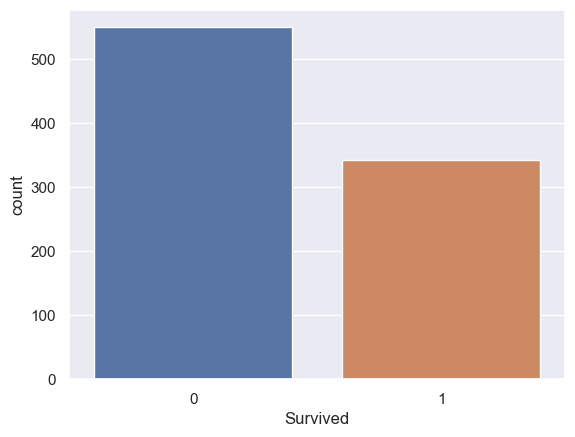

In [53]:
#using count plot for "survied column"
sns.set()
print(titanic_data['Survived'].value_counts())
sns.countplot(x=titanic_data['Survived'])
plt.show()

In [54]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

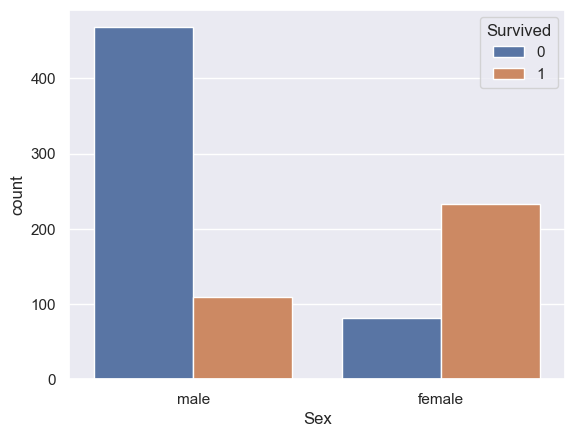

In [56]:
#count plot for "sex" column
sns.countplot(x=titanic_data['Sex'],hue=titanic_data['Survived'])
plt.show()

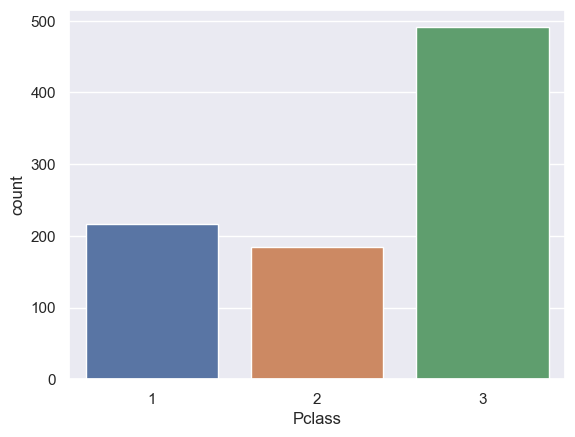

In [67]:
#ploting countplot for Pclass column
sns.countplot(x=titanic_data['Pclass'])
plt.show()

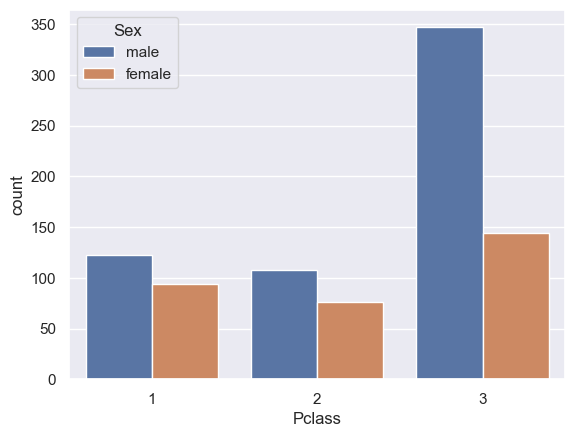

In [69]:
#Distribution of Pclass sex wise
sns.countplot(x = titanic_data['Pclass'],hue=titanic_data['Sex'])
plt.show()

In [70]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [81]:
# showing Correlation
titanic_data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.043835
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.118593
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.009499
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.060606
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.079320
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.063462
Embarked,0.108669,0.043835,0.118593,0.009499,-0.060606,-0.079320,0.063462,1.000000


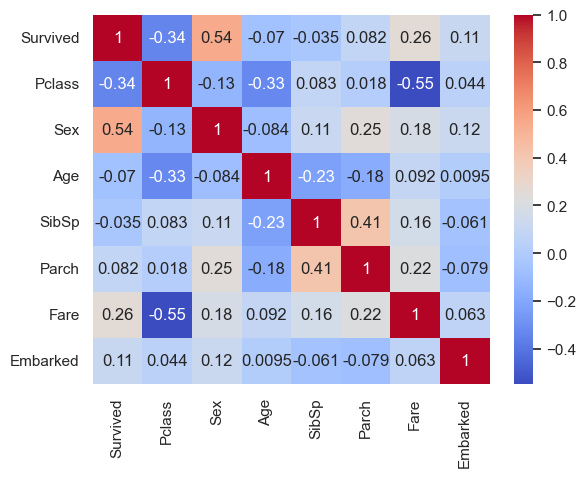

In [83]:
# Showing Correlation Plot
sns.heatmap(titanic_data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [101]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for column in ['Sex','Embarked']:
    titanic_data[column] = le.fit_transform(titanic_data[column])

titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [102]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


SPLITING THE TARGET AND FEATURE

In [103]:
x = titanic_data.drop(columns = 'Survived',axis=1)
y = titanic_data['Survived']

In [104]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [105]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


SPLITTING THE DATA INTO TRAINING AND TESTING DATA

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


### BUILDING THE MODEL

In [107]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

#### LINEAR REGRESSION

In [108]:
# Building the logistic Regression Model
lr = LogisticRegression(max_iter=1000,solver='liblinear')
lr.fit(x_train,y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [109]:
# Computing Training and Testing score
mscore(lr)

Training Score 0.8052434456928839
Testing Score 0.7666666666666667


In [115]:
# Generating Prediction
ypred_lr = lr.predict(x_test)
print(ypred_lr)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [116]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Confusion Matrix
 [[46  7]
 [14 23]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.87      0.81        53
           1       0.77      0.62      0.69        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


#### DECISION TREE CLASSIFIER

In [110]:
# Building the DecisionTree Classifier Model
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [111]:
# Computing Training and Testing score
mscore(dt)

Training Score 0.8551810237203495
Testing Score 0.7777777777777778


In [113]:
# Generating Prediction
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [114]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score',acc_dt)

Confusion Matrix
 [[46  7]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        53
           1       0.77      0.65      0.71        37

    accuracy                           0.78        90
   macro avg       0.78      0.76      0.76        90
weighted avg       0.78      0.78      0.77        90

Accuracy Score 0.7777777777777778


In [118]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree Classifier'],
    'Score': [acc_lr,acc_dt]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree Classifier,0.777778
0,Logistic Regression,0.766667


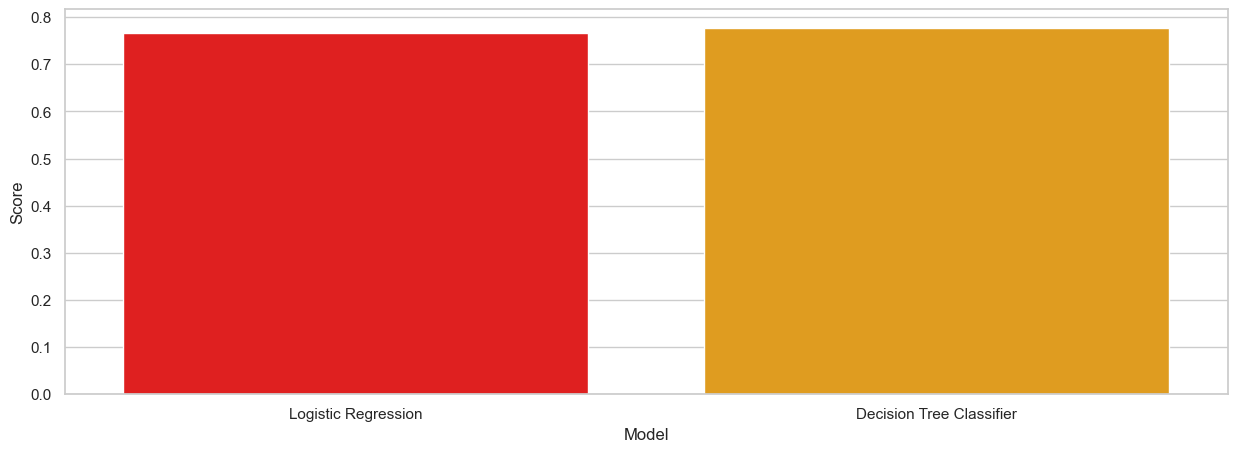

In [121]:
colors = ["red","orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

Comparing two Models, Decision Tree Model as greater accuracy